In [1]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve

from pycaret.classification import *
import xgboost as xgb
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm
import warnings

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me


In [2]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv', header=0, names=[
                     'happy', 
                     'order_delivered',
                     'order_correct',
                     'menu_complete',
                     'price',
                     'courier',
                     'app'
                 ])

In [3]:
df.dtypes

happy              object
order_delivered    object
order_correct      object
menu_complete      object
price              object
courier            object
app                object
dtype: object

In [4]:
X = df.loc[df['happy'].isin(['0','1'])]

In [5]:
X = X.astype(float)

In [6]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(X, target = 'happy')

In [7]:
best = s.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:52:46
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [8]:
best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2903, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
X.head()

,happy,order_delivered,order_correct,menu_complete,price,courier,app
0,0.0,3.0,3.0,3.0,4.0,2.0,4.0
1,0.0,3.0,2.0,3.0,5.0,4.0,3.0
2,1.0,5.0,3.0,3.0,3.0,3.0,5.0
3,0.0,5.0,4.0,3.0,3.0,3.0,5.0
4,0.0,5.0,4.0,3.0,3.0,3.0,5.0


In [10]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2903, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [11]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

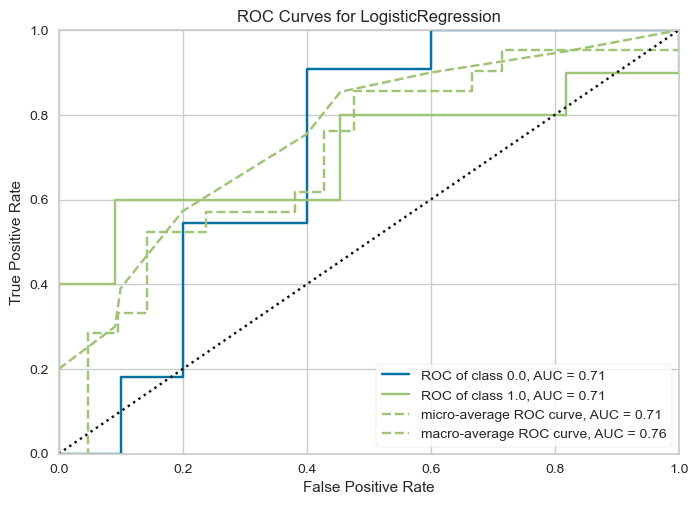

In [12]:
s.plot_model(best, plot = 'auc')

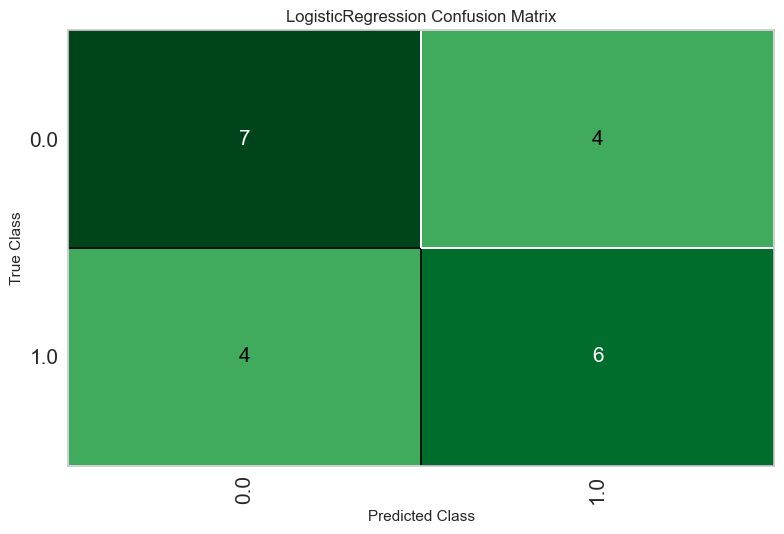

In [13]:
s.plot_model(best, plot = 'confusion_matrix')